In [7]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
x=cancer.data
y=cancer.target
print("dataset shape:",x.shape)
print("Features names:",cancer.feature_names)
print("target names:",cancer.target_names)
print("\n\nfirst five rows of data:",x[:1])


dataset shape: (569, 30)
Features names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
target names: ['malignant' 'benign']


first five rows of data: [[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]]


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print("x_train shape:",x_train.shape)
print("x_train shape:",x_test.shape)


x_train shape: (398, 30)
x_train shape: (171, 30)


In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() 
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)
print("x_train_scaled shape:",x_train_scaled[:1])
print("\n\nactual x_training data:",x_train[:1])

x_train_scaled shape: [[-0.12348985 -0.29680142 -0.17050713 -0.20861569 -1.2016799  -0.7731696
  -0.76231194 -0.93324109 -1.22994935 -0.94816603 -0.53359339 -0.86028757
  -0.61678096 -0.39177533 -1.35556152 -0.52503193 -0.4817033  -0.97940018
  -0.88459317 -0.68548672 -0.19761978 -0.5067476  -0.30791001 -0.27357592
  -1.50742388 -0.44926047 -0.57223884 -0.84082156 -0.8563616  -0.76574773]]


actual x_training data: [[1.374e+01 1.791e+01 8.812e+01 5.850e+02 7.944e-02 6.376e-02 2.881e-02
  1.329e-02 1.473e-01 5.580e-02 2.500e-01 7.574e-01 1.573e+00 2.147e+01
  2.838e-03 1.592e-02 1.780e-02 5.828e-03 1.329e-02 1.976e-03 1.534e+01
  2.246e+01 9.719e+01 7.259e+02 9.711e-02 1.824e-01 1.564e-01 6.019e-02
  2.350e-01 7.014e-02]]


In [25]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100,random_state=42,max_depth=None,min_samples_split=10)
model.fit(x_train_scaled,y_train)

RandomForestClassifier(min_samples_split=10, random_state=42)

### What does `n_estimators=100` mean in RandomForestClassifier?

- `n_estimators` is a hyperparameter that specifies the number of trees in the forest.
more trees means more accurate and stable prediction take more time but less trees make less stable dicision and faster
"Min_sample_split":
Imagine you’re a teacher dividing students into groups by marks to decide who passes/fails:

With min_samples_split = 2:
You keep dividing until only 2 students per group — very specific (“Ali and Sara study 2 hrs/day, so fail”).

With min_samples_split = 10:
You stop dividing when groups are smaller than 10 — more general (“Students studying < 3 hrs fail,

In [26]:
y_pred=model.predict(x_test_scaled)
print("Predicted values:",y_pred[:10])
print("\n\nActual values:",y_test[:10])

Predicted values: [1 0 0 1 1 0 0 0 0 1]


Actual values: [1 0 0 1 1 0 0 0 1 1]


In [29]:
from sklearn.metrics import accuracy_score,r2_score
accuracy=accuracy_score(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Accuracy of the model:",accuracy)
print("R2 score of the model:",r2)

Accuracy of the model: 0.9707602339181286
R2 score of the model: 0.8743386243386243


In [23]:
from  sklearn.pipeline import Pipeline
pipeline=Pipeline([
    ('scaler',StandardScaler()),
    ('ml',RandomForestClassifier(n_estimators=100,random_state=42))
])
pipeline.fit(x_train,y_train)
y_pred_pipeline=pipeline.predict(x_test)
print("Predicted values using pipeline:",y_pred_pipeline[:10])
print("\n\nActual values using pipeline:",y_test[:10])


Predicted values using pipeline: [1 0 0 1 1 0 0 0 0 1]


Actual values using pipeline: [1 0 0 1 1 0 0 0 1 1]


In [24]:
from sklearn.model_selection import GridSearchCV
paragm_grid={
    'ml__n_estimators':[50,100,200],
    'ml__max_depth':[None,10,20,30],
    'ml__min_samples_split':[2,5,10]
}
grid_search=GridSearchCV(pipeline,paragm_grid,cv=5 ,scoring='accuracy')
grid_search.fit(x_train,y_train)
print("Best parameters from grid search:",grid_search.best_params_)


Best parameters from grid search: {'ml__max_depth': None, 'ml__min_samples_split': 10, 'ml__n_estimators': 100}


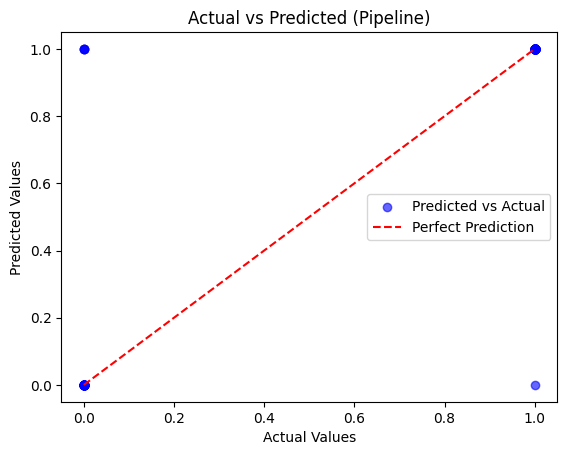

In [34]:
import matplotlib.pyplot as plt

# Scatter plot: Actual vs Predicted
plt.scatter(y_test, y_pred_pipeline, c='blue', label='Predicted vs Actual', alpha=0.6)

# Plot: Diagonal line for perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted (Pipeline)')
plt.legend()
plt.show()


In [3]:
from sklearn.datasets import load_diabetes
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
diabetes=load_diabetes()
x=diabetes.data
y=diabetes.target
scaler=StandardScaler()
regressor=RandomForestRegressor(n_estimators=100,min_samples_split=10)
x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=0.3,random_state=42)

pipeline=Pipeline([
    ('scaler',StandardScaler()),
    ('regressor',RandomForestRegressor(n_estimators=100,min_samples_split=10))
    ])
pipeline.fit(x_train,y_train)
y_pred_reg=pipeline.predict(x_test)
print("Predicted values using pipeline for regression:",y_pred_reg[:5])
print("\n\nActual values using pipeline for regression:",y_test[:5])

Predicted values using pipeline for regression: [200.13178104 200.51908675 202.48819414 248.20170108 197.78750504]


Actual values using pipeline for regression: [208. 261. 179. 258. 262.]


In [4]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred_reg)
r2=r2_score(y_test,y_pred_reg)
print("Mean Squared Error of the regression model:",mse)
print("R2 score of the regression model:",r2)

Mean Squared Error of the regression model: 3829.8281976511676
R2 score of the regression model: 0.37708968136166976


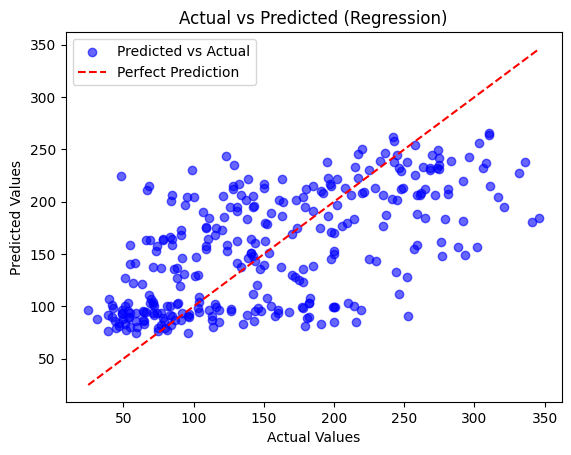

In [9]:
import matplotlib.pyplot as plt

# Scatter plot: Actual vs Predicted values
plt.scatter(y_test, y_pred_reg, color='blue', alpha=0.6, label='Predicted vs Actual')

# Plot: Diagonal line for perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted (Regression)')
plt.legend()
plt.show()

### Explanation of `plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])`

- This line draws a straight diagonal line on the plot.
- The line starts at the minimum value of `y_test` and ends at the maximum value of `y_test` for both axes.
- It represents the ideal case where the predicted values are exactly equal to the actual values.
- Any point lying on this line means the prediction is perfect for that sample.
- Points close to this line indicate good predictions; points far from the line indicate larger errors.

**Purpose:**
- Helps visually compare how close your predictions are to the actual values.
- Makes it easy to spot over- or under-predictions in regression tasks.

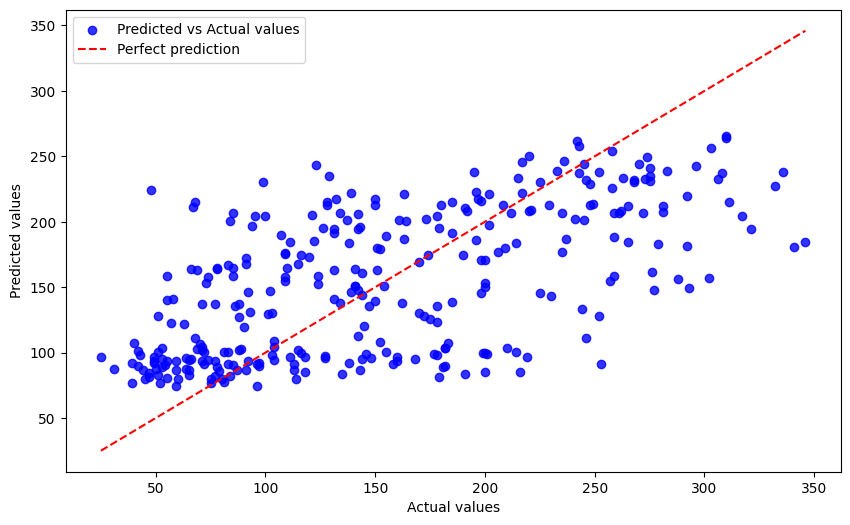

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_reg, c='blue', alpha=0.8, label='Predicted vs Actual values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect prediction')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.show()

In [15]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred_reg)
print("R2 score of the model:", score)

R2 score of the model: 0.37348514425393886
